In [51]:
from oct2py import octave
octave.addpath('~/Github/NSF-Phase1/Blaine/fastica');

In [52]:
import numpy as np
import matplotlib.pyplot as plt
n = 2
samples = 10000
S = np.zeros((n,1))       
#Uniform samples from the n-dimensional simplex 
for i in range(samples):
    U = np.random.uniform(0,1,n)
    tmp = np.array([0,1])
    Final = np.zeros(n)
    U = np.hstack((U,tmp))
    U = np.sort(U)
    for i in range(1,n+1):
        Final[i-1] = U[i] - U[i-1]
    S = np.hstack((S, np.reshape(Final, (n,1))))
S = np.delete(S, 0,1)
simplex = S.copy()


xs_flipped = np.array([])
ys_flipped = np.array([])
xs_ = np.array([])
ys_ = np.array([])
#Uniform in the l-1 ball by flipping signs
for i in range(S.shape[1]):
    binom = np.random.binomial(1,.5)
    if(binom == 1):
        S[0][i] = S[0][i]*(-1)
        xs_flipped = np.append(xs_flipped, i)
    else:
        xs_ = np.append(xs_, i)
for i in range(S.shape[1]):
    binom = np.random.binomial(1,.5)
    if(binom == 1):
        S[1][i] = S[1][i]*(-1)
        ys_flipped = np.append(ys_flipped, i)
    else:
        ys_ = np.append(ys_, i)

In [53]:
S

array([[ 0.30853758,  0.062451  ,  0.19838129, ..., -0.0665961 ,
         0.49155828, -0.13416015],
       [ 0.29450884,  0.38851765, -0.16987979, ...,  0.18054812,
         0.36850165, -0.15672774]])

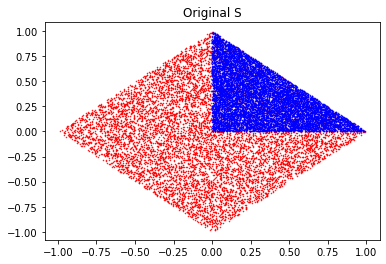

In [54]:
plt.plot(S[0,:], S[1,:], "or", markersize = 0.5)
plt.plot(simplex[0,:], simplex[1,:], "ob", markersize = 0.5)
plt.title("Original S")
plt.show()

In [55]:
A = np.random.normal(0,1,(n,n))   
#Computing the repmat
sqrt = np.sqrt(np.sum(A**2, axis = 0))
A = A  / (np.tile(sqrt,(n,1)))
X = A@S       
X_simplex = A@simplex

In [56]:
A

array([[-0.8185773 , -0.39305751],
       [-0.57439638, -0.91951389]])

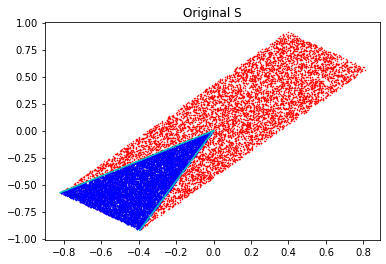

In [57]:
plt.plot(X[0,:], X[1,:], "or", markersize = 0.5)
plt.plot(X_simplex[0,:], X_simplex[1,:], "ob", markersize = 0.5)
plt.plot([0, A[0,0]], [0, A[1,0]], "c-")
plt.plot([0, A[0,1]], [0, A[1,1]], "c-")
plt.title("Original S")
plt.show()

In [58]:
for i in xs_flipped:
    X[0][int(i)] = X[0][int(i)]*(-1)

In [59]:
for i in ys_flipped:
    X[1][int(i)] = X[1][int(i)]*(-1)

In [35]:
for i in xs_:
    X[1][int(i)] = X[1][int(i)]*(-1)

In [36]:
for i in ys_:
    X[1][int(i)] = X[1][int(i)]*(-1)

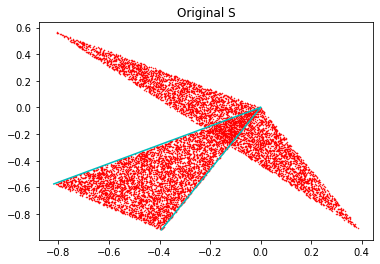

In [60]:
plt.plot(X[0,:], X[1,:], "or", markersize = 0.5)
plt.plot([0, A[0,0]], [0, A[1,0]], "c-")
plt.plot([0, A[0,1]], [0, A[1,1]], "c-")
plt.title("Original S")
plt.show()

In [38]:
temp_ = np.linalg.inv(A)@X

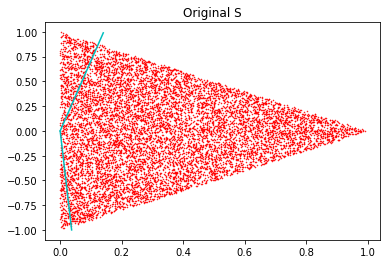

In [39]:
plt.plot(temp_[0,:], temp_[1,:], "or", markersize = 0.5)
plt.plot([0, A[0,0]], [0, A[1,0]], "c-")
plt.plot([0, A[0,1]], [0, A[1,1]], "c-")
plt.title("Original S")
plt.show()

In [40]:
X_test_l1 = temp_.copy()
z = np.zeros((n,1))
x = np.hstack((z, np.eye(n)))
V = x
sol = np.dot(A, V)

[[ 0.00600309  0.03697589  1.04819172]
 [ 1.01172607 -0.93683104  0.04914014]]
[[ 0.          0.03726149  0.14025288]
 [ 0.         -0.99930555  0.99011571]]


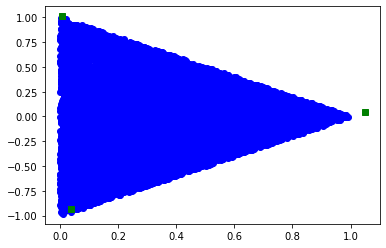

In [41]:
X_test_l1 = np.vstack([X_test_l1, np.ones((1,X_test_l1.shape[1]))])
T = np.random.gamma(X_test_l1.shape[0], 1, (1,X_test_l1.shape[1]))
Q = X_test_l1 * np.tile(T,(X_test_l1.shape[0],1))

A_EST = octave.o2pfastica(Q)
sign = 1 / A_EST[-1,:]
arr = (A_EST) * np.tile(sign,(A_EST.shape[0], 1))
verts = arr[0:-1,:]

print(verts)
print(sol)
plt.plot(X_test_l1[0, :], X_test_l1[1, :], "bo")
plt.plot(verts[0, :], verts[1, :], "gs")
plt.show()

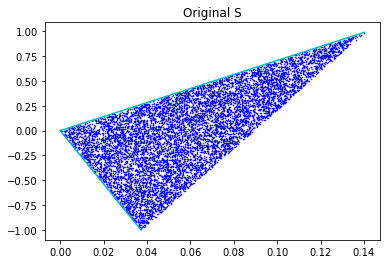

In [42]:
plt.plot(X_simplex[0,:], X_simplex[1,:], "ob", markersize = 0.5)
plt.plot([0, A[0,0]], [0, A[1,0]], "c-")
plt.plot([0, A[0,1]], [0, A[1,1]], "c-")
plt.title("Original S")
plt.show()

In [43]:
X_test = X_simplex.copy()

In [44]:
z = np.zeros((n,1))
x = np.hstack((z, np.eye(n)))
V = x
sol = np.dot(A, V)

[[ 3.53257171e-02 -1.92586232e-03  1.36713914e-01]
 [-1.02700003e+00 -1.40619665e-04  9.51043183e-01]]
[[ 0.          0.03726149  0.14025288]
 [ 0.         -0.99930555  0.99011571]]


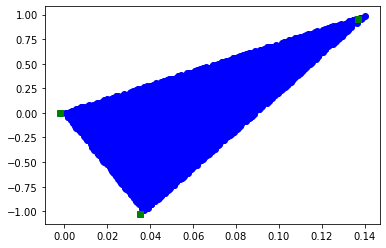

In [45]:
X_test = np.vstack([X_test, np.ones((1,X_test.shape[1]))])
T = np.random.gamma(X_test.shape[0], 1, (1,X_test.shape[1]))
Q = X_test * np.tile(T,(X_test.shape[0],1))

A_EST = octave.o2pfastica(Q)
sign = 1 / A_EST[-1,:]
arr = (A_EST) * np.tile(sign,(A_EST.shape[0], 1))
verts = arr[0:-1,:]

print(verts)
print(sol)
plt.plot(X_test[0, :], X_test[1, :], "bo")
plt.plot(verts[0, :], verts[1, :], "gs")
plt.show()

In [46]:
temp = np.linalg.inv(A)@X_simplex

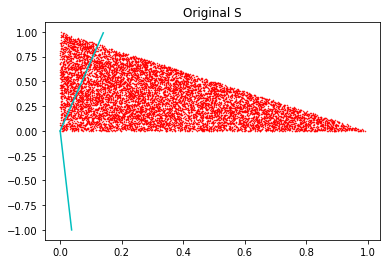

In [47]:
plt.plot(temp[0,:], temp[1,:], "or", markersize = 0.5)
plt.plot([0, A[0,0]], [0, A[1,0]], "c-")
plt.plot([0, A[0,1]], [0, A[1,1]], "c-")
plt.title("Original S")
plt.show()

In [48]:
X

array([[ 0.09182213,  0.03708371, -0.01711259, ..., -0.00941794,
        -0.08782099,  0.12564583],
       [ 0.11981448, -0.89649889, -0.82140776, ..., -0.20261786,
        -0.70147421,  0.77690229]])

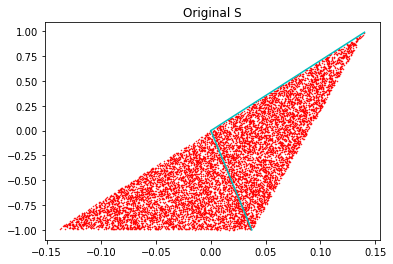

In [49]:
plt.plot(X[0,:], X[1,:], "or", markersize = 0.5)
plt.plot([0, A[0,0]], [0, A[1,0]], "c-")
plt.plot([0, A[0,1]], [0, A[1,1]], "c-")
plt.title("Original S")
plt.show()

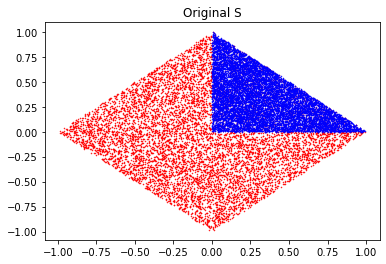

In [50]:
plt.plot(S[0,:], S[1,:], "or", markersize = 0.5)
plt.plot(simplex[0,:], simplex[1,:], "ob", markersize = 0.5)
plt.title("Original S")
plt.show()